In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [55]:
help(mesolve)

Help on function mesolve in module qutip.solver.mesolve:

mesolve(H, rho0, tlist, c_ops=None, e_ops=None, args=None, options=None, **kwargs)
    Master equation evolution of a density matrix for a given Hamiltonian and
    set of collapse operators, or a Liouvillian.

    Evolve the state vector or density matrix (``rho0``) using a given
    Hamiltonian or Liouvillian (``H``) and an optional set of collapse operators
    (``c_ops``), by integrating the set of ordinary differential equations
    that define the system. In the absence of collapse operators the system is
    evolved according to the unitary evolution of the Hamiltonian.

    The output is either the state vector at arbitrary points in time
    (``tlist``), or the expectation values of the supplied operators
    (``e_ops``). If e_ops is a callback function, it is invoked for each
    time in ``tlist`` with time and the state as arguments, and the function
    does not use any return values.

    If either ``H`` or the Qobj

In [19]:
times = np.linspace(0.0, 20.0, 200) # creates 200 even points from 0 - 10 
psi0 = tensor(fock(2, 0), fock(10, 2)) # initial state of system in matrix form 
a  = tensor(qeye(2), destroy(10)) # annihilation operator (destroy(#dimensions)) (qeye(#dimensions) -- makes identity mtx)
sm = tensor(destroy(2), qeye(10)) # lowering operator

# Hamiltonian Parameters
g = 2*np.pi*1 # coupling strength (normalized)
kappa = 0.1
gamma = 0.1
C1 = np.sqrt(kappa)* a # cavity photon loss collapse op
C2 = np.sqrt(gamma) * sm # spontaneous emission collapse op
H = np.pi*a.dag()*a + np.pi*sm.dag()*sm + g*(sm*a.dag() + sm.dag()*a) 

# solving using monte carlo and master equation methods
e_ops=[a.dag() * a, sm.dag() * sm]
c_ops= [C1, C2] 
data = mcsolve(H, psi0, times, c_ops, e_ops=e_ops)
result =  mesolve(H, psi0, times, c_ops, e_ops=e_ops)

10.0%. Run time:   2.45s. Est. time left: 00:00:00:22
20.0%. Run time:   4.99s. Est. time left: 00:00:00:19
30.0%. Run time:   7.50s. Est. time left: 00:00:00:17
40.0%. Run time:   9.96s. Est. time left: 00:00:00:14
50.0%. Run time:  12.44s. Est. time left: 00:00:00:12
60.0%. Run time:  15.06s. Est. time left: 00:00:00:10
70.0%. Run time:  17.46s. Est. time left: 00:00:00:07
80.0%. Run time:  20.15s. Est. time left: 00:00:00:05
90.0%. Run time:  22.61s. Est. time left: 00:00:00:02
100.0%. Run time:  25.12s. Est. time left: 00:00:00:00
Total run time:  25.18s


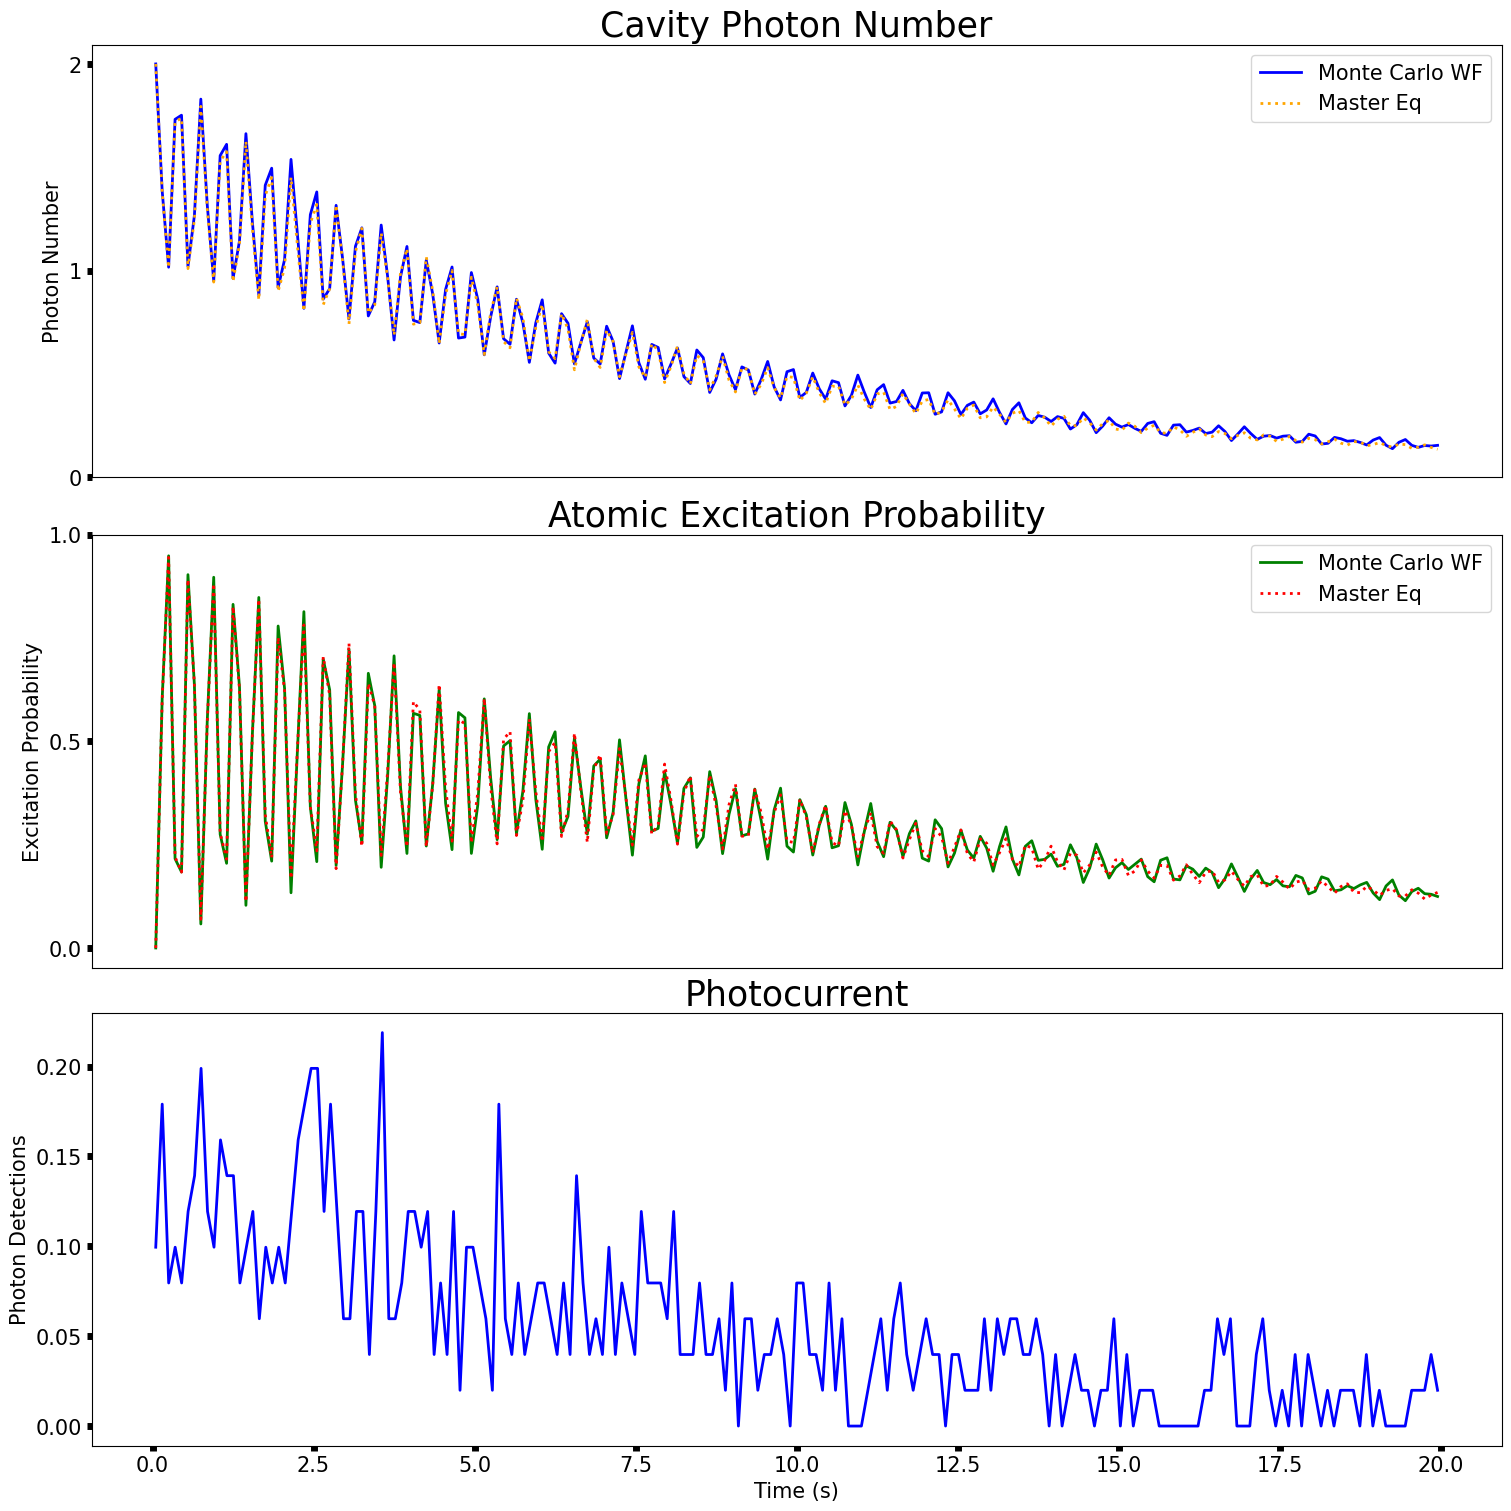

In [21]:
fig0, ((ax1, ax2,ax3)) = plt.subplots(3, 1, figsize=(15, 15),constrained_layout=True)
fig0.patch.set_facecolor('white')

# Comparing MCSolve to MESolve for Cavity Photon Number
ax1.set_title('Cavity Photon Number', fontsize=25) 
ax1.plot(times, data.expect[0],c = 'blue', linewidth=2)
ax1.plot(times,result.expect[0],c = 'orange',linewidth=2, linestyle='dotted')
ax1.set_ylabel("Photon Number" ,fontsize=15)
ax1.set_yticks([0,1,2])
ax1.set_xticks([])
ax1.tick_params(axis='both', which='major', width = 5)
ax1.legend(("Monte Carlo WF", "Master Eq"),loc="upper right",fontsize=15)

# Comparing Atomic Excitation Probability for MC/MESolve
ax2.set_title('Atomic Excitation Probability', fontsize=25) 
ax2.plot(times, data.expect[1],c = 'green', linewidth=2)
ax2.plot(times,result.expect[1],c = 'red',linewidth=2, linestyle='dotted')
ax2.set_ylabel("Excitation Probability" ,fontsize=15)
ax2.set_yticks([0,0.5,1])
ax2.set_xticks([])
ax2.tick_params(axis='both', which='major', width = 5)
ax2.legend(("Monte Carlo WF", "Master Eq"),loc="upper right",fontsize=15)

# Photocurrent for MCSolve
ax3.set_title('Photocurrent', fontsize=25) 
ax3.plot((times[:-1]+times[1:])/2, data.photocurrent[0],c = 'blue', linewidth=2)
ax3.set_xlabel("Time (s)" ,fontsize=15)
ax3.set_ylabel("Photon Detections" ,fontsize=15)
ax3.tick_params(axis='both', which='major', width = 5)

for tick in ax1.get_yticklabels():
    tick.set_fontsize("15")
for tick in ax3.get_xticklabels():
    tick.set_fontsize("15")
for tick in ax2.get_yticklabels():
    tick.set_fontsize("15")
for tick in ax3.get_yticklabels():
    tick.set_fontsize("15")
plt.show()

In [14]:
# Exploring trajectories
data1 = mcsolve(H, psi0, times, c_ops, e_ops=e_ops, ntraj=1000)
#data10 = data1 + mcsolve(H, psi0, times, c_ops, e_ops=e_ops, ntraj=9)
#data100 = data10 + mcsolve(H, psi0, times, c_ops, e_ops=e_ops)

#expt1=data1.expect
#expt10=data10.expect
#expt100=data100.expect

#result1 = mcsolve(H, psi0, times, c_ops, e_ops=e_ops, ntraj=1)
#result10 = data1 + mcsolve(H, psi0, times, c_ops, e_ops=e_ops, ntraj=9)
#result100 = data10 + mcsolve(H, psi0, times, c_ops, e_ops=e_ops)


10.0%. Run time:   5.51s. Est. time left: 00:00:00:49
20.0%. Run time:  11.03s. Est. time left: 00:00:00:44
30.0%. Run time:  16.41s. Est. time left: 00:00:00:38
40.0%. Run time:  22.06s. Est. time left: 00:00:00:33
50.0%. Run time:  27.55s. Est. time left: 00:00:00:27
60.0%. Run time:  33.22s. Est. time left: 00:00:00:22
70.0%. Run time:  38.76s. Est. time left: 00:00:00:16
80.0%. Run time:  44.27s. Est. time left: 00:00:00:11
90.0%. Run time:  49.86s. Est. time left: 00:00:00:05
100.0%. Run time:  55.40s. Est. time left: 00:00:00:00
Total run time:  55.46s


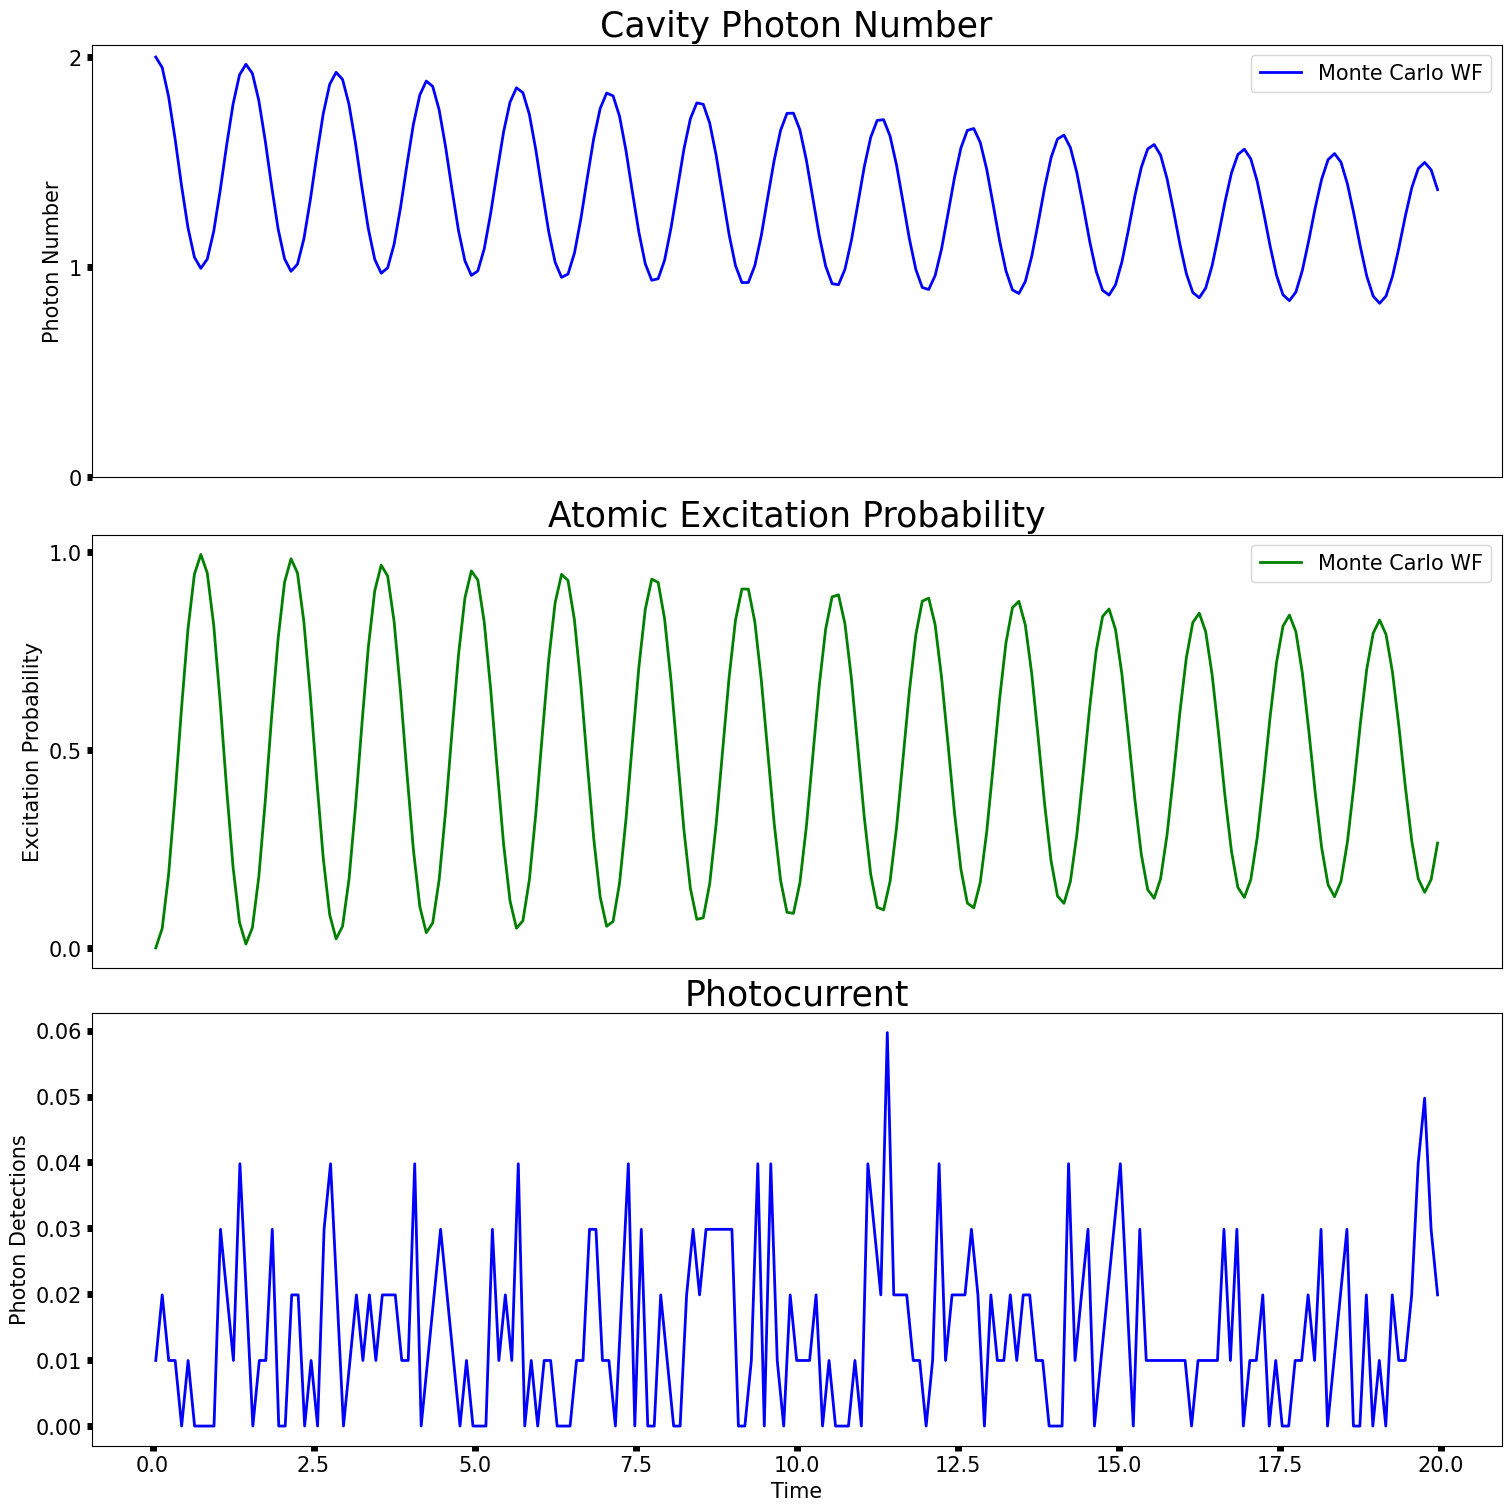

In [ ]:
fig1, ((ax1, ax2,ax3)) = plt.subplots(3, 1, figsize=(15, 15),constrained_layout=True)
fig1.patch.set_facecolor('white')

# Comparing MCSolve to MESolve for Cavity Photon Number
ax1.set_title('Cavity Photon Number', fontsize=25) 
ax1.plot(times, data1.expect[0],c = 'blue', linewidth=2)
ax1.set_ylabel("Photon Number" ,fontsize=15)
ax1.set_yticks([0,1,2])
ax1.set_xticks([])
ax1.tick_params(axis='both', which='major', width = 5)
ax1.legend(("Monte Carlo WF", "Master Eq"),loc="upper right",fontsize=15)

# Comparing Atomic Excitation Probability for MC/MESolve
ax2.set_title('Atomic Excitation Probability', fontsize=25) 
ax2.plot(times, data1.expect[1],c = 'green', linewidth=2)
ax2.set_ylabel("Excitation Probability" ,fontsize=15)
ax2.set_yticks([0,0.5,1])
ax2.set_xticks([])
ax2.tick_params(axis='both', which='major', width = 5)
ax2.legend(("Monte Carlo WF", "Master Eq"),loc="upper right",fontsize=15)

# Photocurrent for MCSolve
ax3.set_title('Photocurrent', fontsize=25) 
ax3.plot((times[:-1]+times[1:])/2, data1.photocurrent[0],c = 'blue', linewidth=2)
ax3.set_xlabel("Time" ,fontsize=15)
ax3.set_ylabel("Photon Detections" ,fontsize=15)
ax3.tick_params(axis='both', which='major', width = 5)

for tick in ax1.get_yticklabels():
    tick.set_fontsize("15")
for tick in ax3.get_xticklabels():
    tick.set_fontsize("15")
for tick in ax2.get_yticklabels():
    tick.set_fontsize("15")
for tick in ax3.get_yticklabels():
    tick.set_fontsize("15")
plt.show()

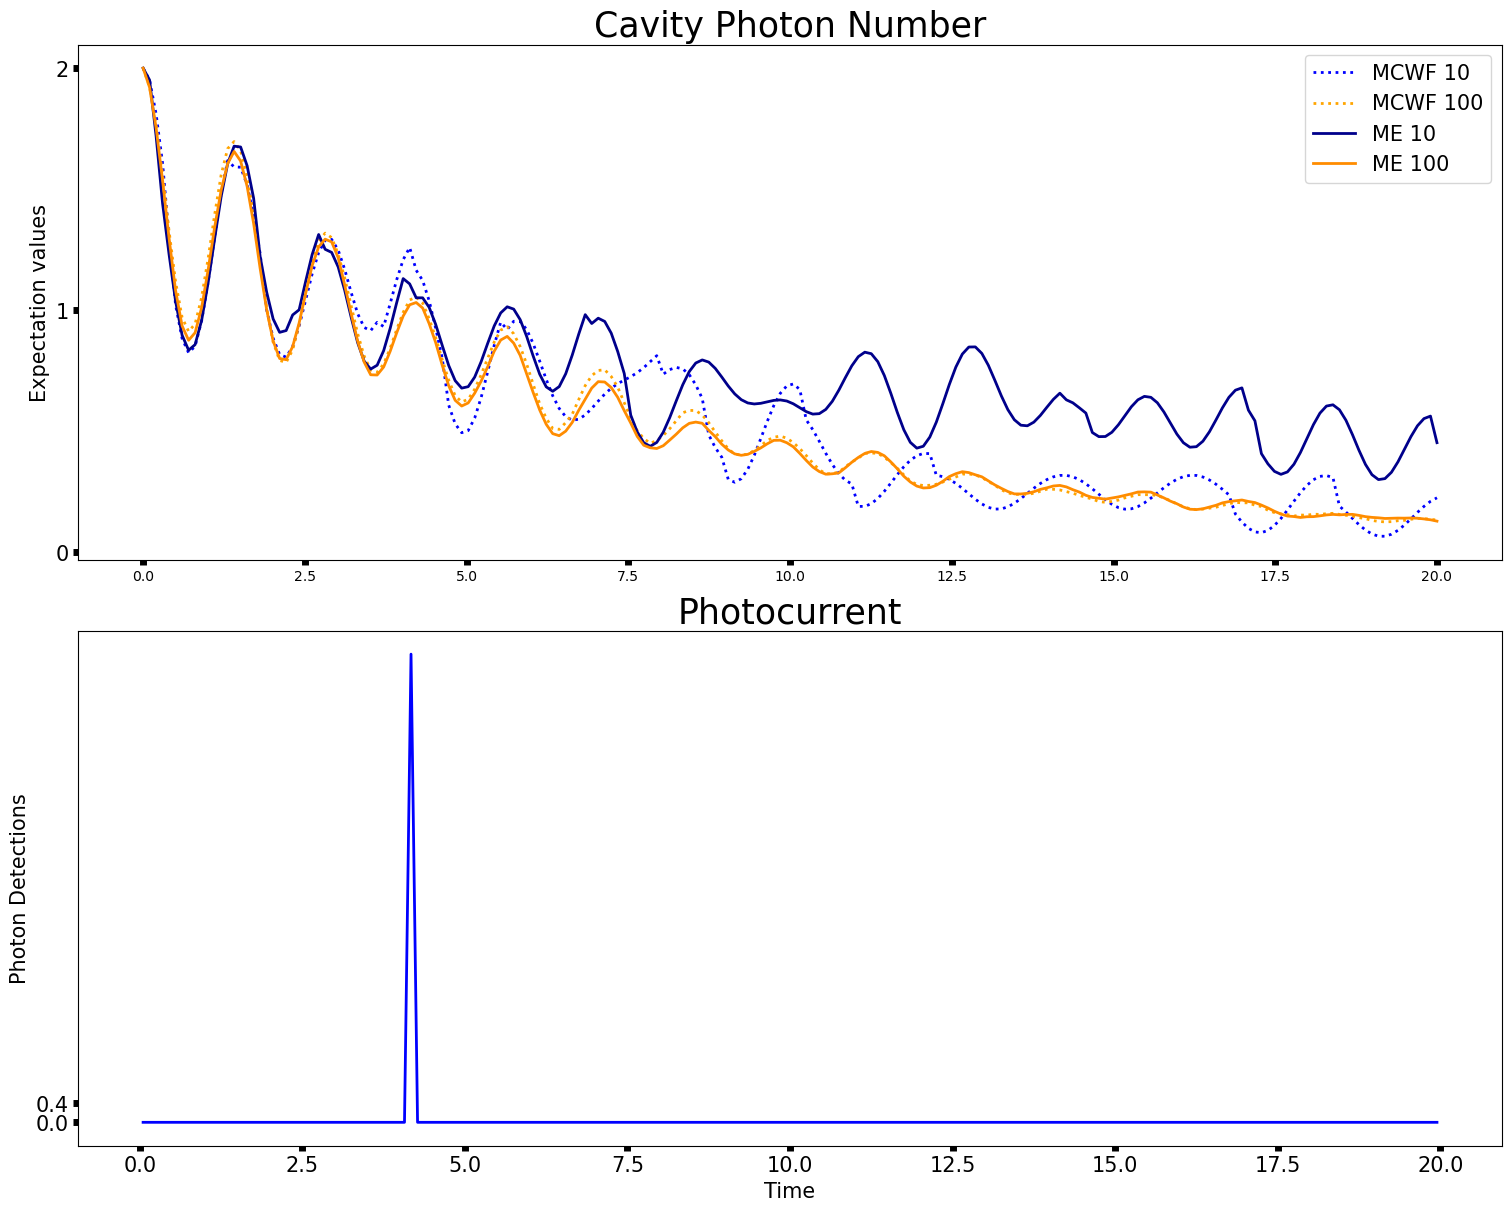

In [34]:
fig0, ((ax1, ax2)) = plt.subplots(2, 1, figsize=(15, 12),constrained_layout=True)
fig0.patch.set_facecolor('white')

ax1.set_title('Cavity Photon Number', fontsize=25) 
#ax1.plot(times, expt1[0],c = 'blue', linewidth=2, linestyle='dotted')
ax1.plot(times, expt10[0],c = 'blue', linewidth=2,label='Monte Carlo WF', linestyle='dotted')
ax1.plot(times, expt100[0],c = 'orange', linewidth=2,label='traj = 100', linestyle='dotted')
#ax1.plot(times, exptr1[0],c = 'darkblue',linewidth=2)
ax1.plot(times, exptr10[0],c = 'darkblue',label='Master Eq',linewidth=2)
ax1.plot(times, exptr100[0],c = 'darkorange',linewidth=2)
ax1.set_ylabel("Expectation values" ,fontsize=15)
ax1.set_yticks([0,1,2])
ax1.tick_params(axis='both', which='major', width = 5)
ax1.legend(("MCWF 10","MCWF 100", "ME 10", "ME 100"),loc="upper right",fontsize=15)
#ax1.legend(loc="upper left",prop={'family':"Times New Roman", 'size':45})

ax2.set_title('Photocurrent', fontsize=25) 
ax2.plot((times[:-1]+times[1:])/2, data1.photocurrent[0],c = 'blue', linewidth=2)
#ax2.plot((times[:-1]+times[1:])/2,result.photocurrent[0],c = 'orange',linewidth=2)
ax2.set_xlabel("Time" ,fontsize=15)
ax2.set_ylabel("Photon Detections" ,fontsize=15)
ax2.set_yticks([0,0.4])
ax2.tick_params(axis='both', which='major', width = 5)

for tick in ax1.get_yticklabels():
    tick.set_fontsize("15")
for tick in ax2.get_xticklabels():
    tick.set_fontsize("15")
for tick in ax2.get_yticklabels():
    tick.set_fontsize("15")
plt.show()

10.0%. Run time:   3.95s. Est. time left: 00:00:00:35
20.0%. Run time:   7.32s. Est. time left: 00:00:00:29
30.0%. Run time:  10.78s. Est. time left: 00:00:00:25
40.0%. Run time:  14.31s. Est. time left: 00:00:00:21
50.0%. Run time:  17.94s. Est. time left: 00:00:00:17
60.0%. Run time:  21.40s. Est. time left: 00:00:00:14
70.0%. Run time:  24.85s. Est. time left: 00:00:00:10
80.0%. Run time:  28.36s. Est. time left: 00:00:00:07
90.0%. Run time:  31.92s. Est. time left: 00:00:00:03
100.0%. Run time:  35.31s. Est. time left: 00:00:00:00
Total run time:  35.38s


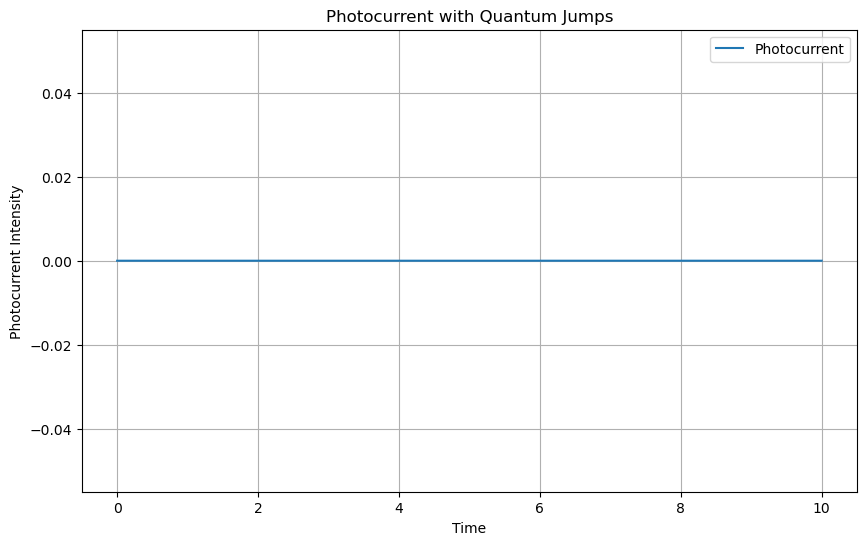

In [16]:

# Parameters
gamma = 0.1  # Decay rate (spontaneous emission rate)
omega = 2 * np.pi  # Transition frequency
dt = 0.01  # Time step
N = 1000  # Number of time steps

# Time array
times = np.linspace(0, dt * N, N)

# Define system operators
sm = destroy(2)  # Lowering operator for a two-level system (qubit)
H = omega * sm.dag() * sm  # Hamiltonian (free evolution)

# Collapse operator
c_ops = [np.sqrt(gamma) * sm]

# Initial state: excited state
psi0 = basis(2, 1)

# Monte Carlo trajectory simulation
mc_result = mcsolve(H, psi0, times, c_ops, [])  # Single trajectory

# Compute photocurrent
photocurrent = np.zeros(len(times))  # Initialize photocurrent array
states = mc_result.states

# Photocurrent spikes at jump times
for t in range(1, len(states)):
    # Calculate overlap to detect jump
    overlap = (states[t-1].dag() * sm * states[t]).full()  # Extract scalar value
    if np.abs(overlap[0, 0]) > 0:  # Check if jump occurred
        photocurrent[t] = 1  # Register jump (spike)

# Plot the photocurrent graph
plt.figure(figsize=(10, 6))
plt.step(times, photocurrent, where='mid', label="Photocurrent")
plt.xlabel("Time")
plt.ylabel("Photocurrent Intensity")
plt.title("Photocurrent with Quantum Jumps")
plt.legend()
plt.grid()
plt.show()
